In [3]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# open the HDF5 file
f = h5py.File("60_10_le-00046.h5")

# read the axes and the current simulation time
r = f['/00001/x'][:] * 1e16
t = (f['/00001/time'][:][0] + 1.206045378) * 1e16 / 2.99792458e10 / 86400 # convert time to days

# read the hydro data and convert to cgs units
rho = f['/00001/densty'][0, 0, :] * 1.67262158e-24
P = f['/00001/pres'][0, 0, :] * 1.67262158e-24 * (2.99792458e10)**2

# read the velocities and leave them as betas
betar = f['/00001/velx'][0, 0, :]

In [10]:
# create the data frame
data = pd.DataFrame({
    'r': r,
    'rho': np.log10(rho),
    'P': np.log10(P),
    'betar': betar
})

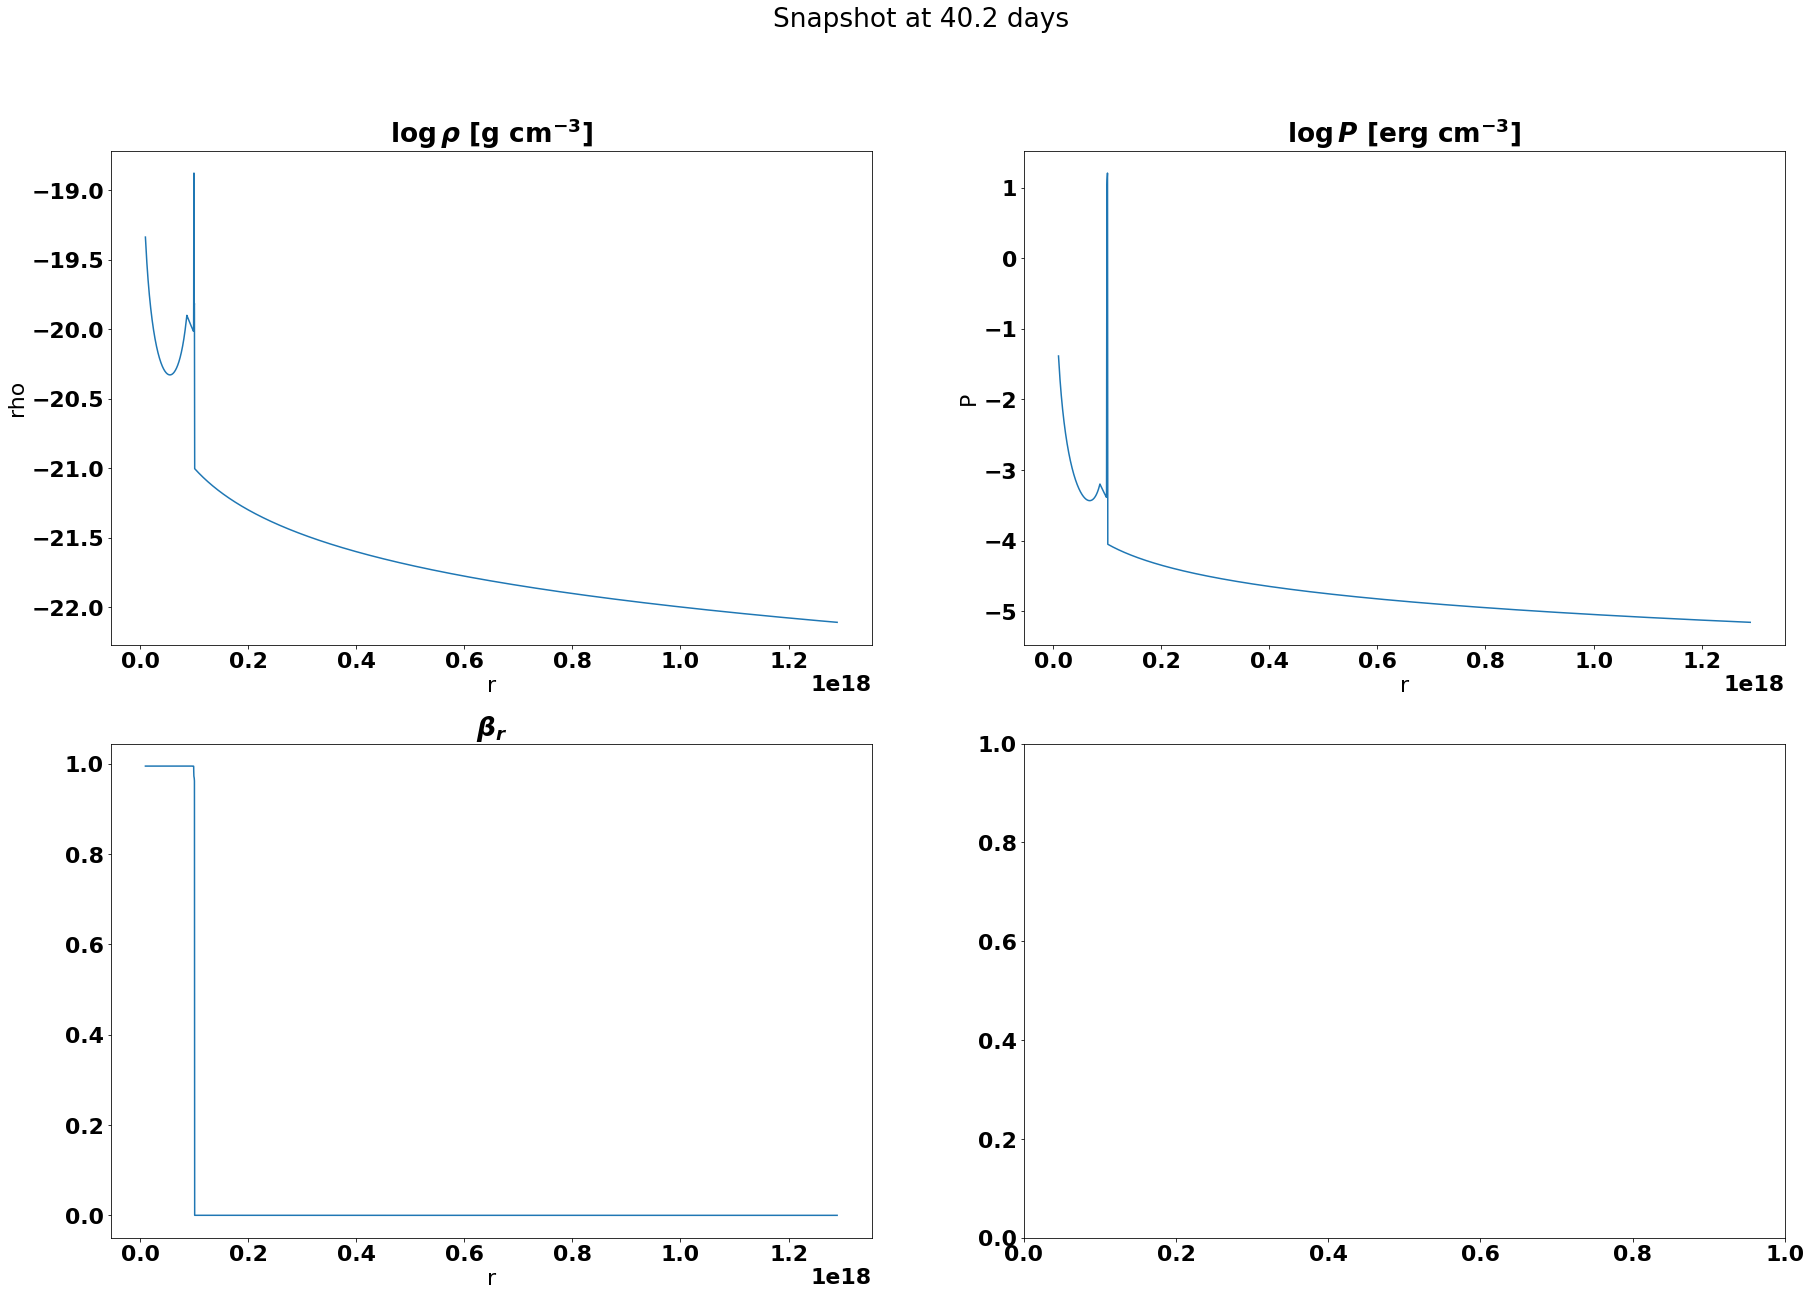

In [15]:
# plot the data frame
plot_panels = {'rho': 'rho', 'P': 'P', 'betar': betar}
plot_panel_names = {'rho': r'$\log \rho\ [{\rm g\ cm}^{-3}]$', 'P': r'$\log P\ [{\rm erg\ cm}^{-3}]$', 'betar': r'$\beta_r$'}
panel_names = list(plot_panels.keys())
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# plot each variable
for cur_row in range(2):
    for cur_col in range(2):
        if cur_row * 2 + cur_col >= len(panel_names):
            continue
        panel_name = panel_names[cur_row * 2 + cur_col]
        cur_ax = ax[cur_row][cur_col]
        sns.lineplot(data=data, x='r', y=plot_panels[panel_name], ax=cur_ax, ci=False)
        
        # set panel title
        cur_ax.set_title(plot_panel_names[panel_name])
        

fig.suptitle("Snapshot at {:.1f} days".format(t))
plt.show()